In [1]:
%matplotlib inline
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()       #load data

K = len(np.unique(y_train)) 
    # Number of classes
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Create a sequential model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))        
model.add(layers.MaxPooling2D((2,2)))                                               
model.add(layers.Conv2D(64,(3,3), activation='relu' ))                              
model.add(layers.MaxPooling2D((2,2)))                                               
model.add(layers.Conv2D(64,(3,3), activation='relu' ))                              
model.add(layers.MaxPooling2D((2,2)))                                              
model.add(layers.Flatten())                                                         
model.add(layers.Dense(64, activation='relu' ))                                     
model.add(layers.Dense(10))                                                         

model.summary()     

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.999, momentum =0.9, name='optimizer', nesterov= False) 
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 

history = model.fit(x_train, y_train, epochs=40, batch_size=50, validation_data=(x_test, y_test))

print(model.optimizer.get_config())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

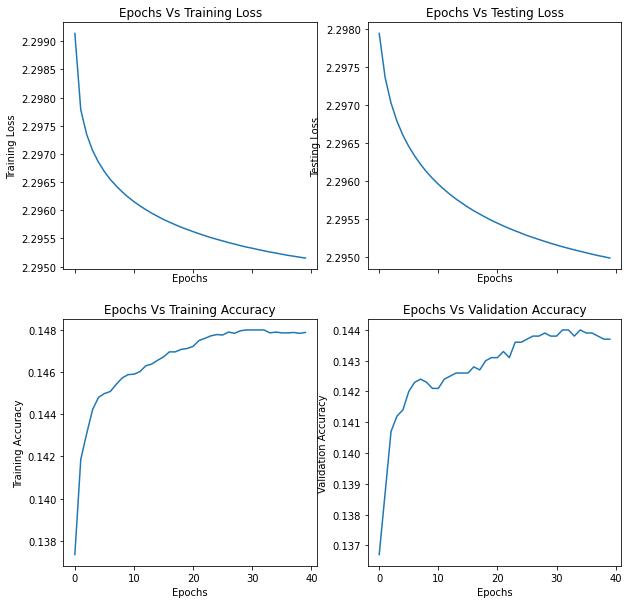

In [3]:
fig, ax = plt.subplots(2,2, figsize = (10,10), sharex=True)
ax[0,0].plot(history.history['loss'])
ax[0,0].set_title('Epochs Vs Training Loss')
ax[0,0].set(xlabel='Epochs', ylabel='Training Loss')

ax[0,1].plot(history.history['val_loss'])
ax[0,1].set_title('Epochs Vs Testing Loss')
ax[0,1].set(xlabel='Epochs', ylabel='Testing Loss')

ax[1,0].plot(history.history['accuracy'])
ax[1,0].set_title('Epochs Vs Training Accuracy')
ax[1,0].set(xlabel='Epochs', ylabel='Training Accuracy')

ax[1,1].plot(history.history['val_accuracy'])
ax[1,1].set_title('Epochs Vs Validation Accuracy')
ax[1,1].set(xlabel='Epochs', ylabel='Validation Accuracy')
plt.show()